In [1]:
#To start we have to import necessary packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Prosper Loan Case Study

For this case study I will be exploring a set of attributes for some current and historical loans for Prosper loan company. Some of the data is mixed with missing values because the set seems to be joined with some that was done after Prosper changed their recording fields. Some cleaning was needed but will not be explained here. It is only necessary to know that roughly 20% of the points were not included for explanation and the final number of data points was 97905.

What can be learned from this data set? There are likely several questions you could pose but I am going to focus on what I would assume is the number one revenue performance indicator, paying a loan on time.

So for this exploration, I will show what I feel can be taken from this data set in regards to loan success. Unfortunately, the majority of the data points are in the successful category, per my criteria, which is 'Current' or 'Completed' which signifies a loan that is being paid on time. The rest are scenarios where a non-ideal status is present such as a payment being delayed or the loan counted off completely. Now you will see a figure depicting the state of the data set value 'Loan Status' showing the breakdown of successful and unsuccessful loans. "Unsuccessful" loans will be in red.

In [2]:
#cleaning up the data to be used for explanatory visualizations. Further explanation in exploratory file.
Prosper = pd.read_csv('prosperLoanData.csv')
loan_data = Prosper.copy()
columns_to_drop = ['BorrowerState', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
                   'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 
                   'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 
                   'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 
                   'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 
                   'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'LoanCurrentDaysDelinquent', 
                   'LoanFirstDefaultedCycleNumber', 'LoanOriginationQuarter', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 
                   'LP_InterestandFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 
                   'LP_NonPrincipalRecoverypayments', 'ClosedDate', 'ListingCreationDate', 'ListingKey', 'EstimatedLoss', 
                   'EstimatedReturn', 'Occupation', 'EstimatedEffectiveYield', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 
                   'IncomeRange', 'ScorexChangeAtTimeOfListing']
loan_data = loan_data.drop(columns=columns_to_drop, inplace=False)
droppable = ['CreditGrade', 'ProsperRating (Alpha)', 'ProsperRating (numeric)', 'TotalProsperLoans', 'LP_ServiceFees', 
             'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding']
loan_data['ProsperCustomerHistory'] = np.where(loan_data['ProsperPrincipalBorrowed']>=0, True, False)
loan_data = loan_data.drop(columns=droppable, inplace=False)
loan_data = loan_data.dropna(subset = ['EmploymentStatus', 'CurrentDelinquencies', 'AmountDelinquent', 
                           'DelinquenciesLast7Years', 'DebtToIncomeRatio'])
loan_data = loan_data.rename(columns={'Term':'Term(months)'})
loan_data = loan_data.replace(['Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (61-90 days)', 
                   'Past Due (16-30 days)', 'Past Due (>120 days)', 'Cancelled', 'FinalPaymentInProgress'], ['Past Due', 
                    'Past Due', 'Past Due', 'Past Due', 'Past Due', 'Past Due', 'Chargedoff', 'Completed'])

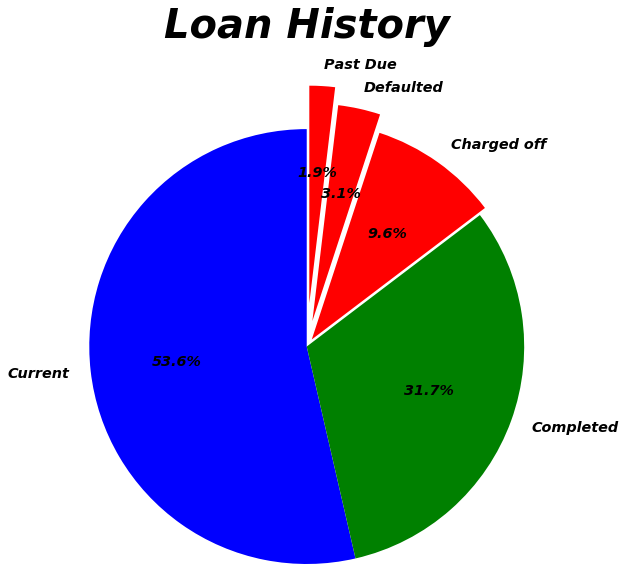

In [3]:
labels = 'Current', 'Completed', 'Charged off', 'Defaulted', 'Past Due'
sizes = [52478/97905, 31070/97905, 9424/97905, 3076/97905, 1857/97905]
colors= ['b', 'g', 'r', 'r', 'r']
explode = (0, 0, 0.1, 0.3, 0.5) 

fig1, ax = plt.subplots()
ax.pie(sizes, radius = 2.5, explode=explode, labels=labels, colors=colors, textprops={'size': 'x-large', 'fontweight': 'heavy', 
                                                                                         'style': 'italic'}, 
       autopct='%1.1f%%', shadow=False, startangle=90)
ax.set_title('Loan History', pad=200, size=40, fontweight='heavy', style='oblique')
plt.show()

As you can see, the data points I will be focusing on are a much smaller percentage than I would like. However, I will look at these points compared to the "Successful" loans and try to establish some basic insights and build on that.

I will start by looking at the loan status broken down by term and borrower APR(average for the given category). I found earlier that these two factors show the most clear effect on loan completion based upon the fields I kept. Also, because the loan term lengths have variate total counts in the data set, I will add some confidence interval bars to the figure to give the viewer an idea of the confidence they can have in each of the shown average borrower APRs for each loan length.

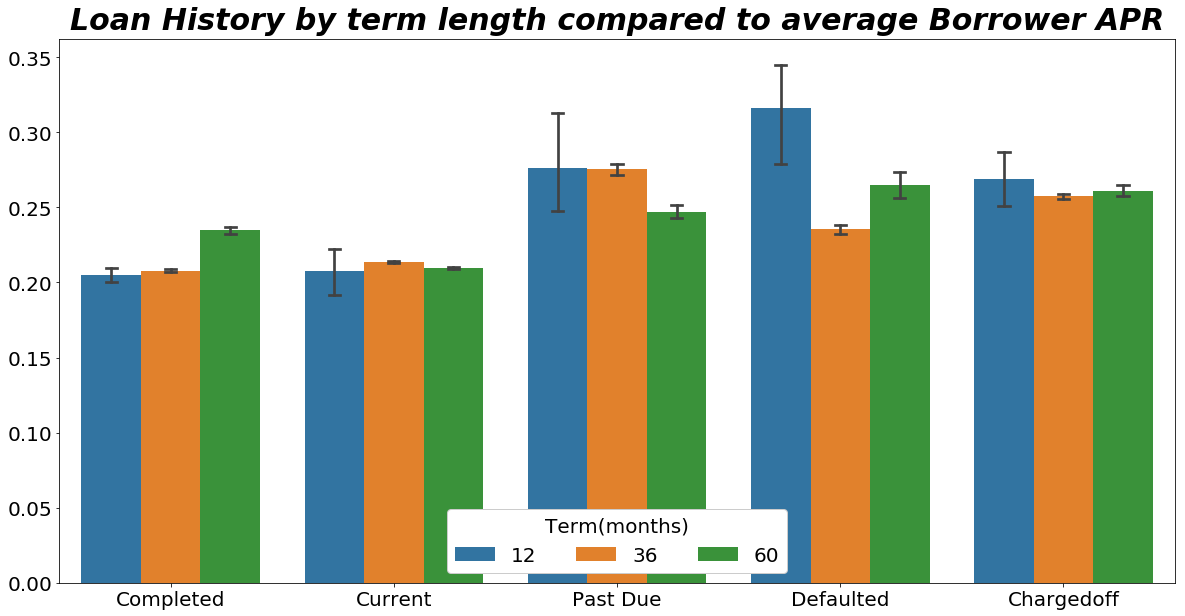

<Figure size 432x288 with 0 Axes>

In [4]:
fig = plt.figure(figsize=(20,10), frameon=False);
ax = sb.barplot(data = loan_data, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'Term(months)', capsize=.05);
legend = ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term(months)', prop={'size': 20});
fig = plt.yticks(fontsize=20);
fig = plt.xticks(fontsize=20);
fig = plt.xlabel('');
fig = plt.ylabel('');
fig = plt.figure(frameon=False);
fig = plt.setp(legend.get_title(),fontsize=20);
fig = ax.set_title('Loan History by term length compared to average Borrower APR', 
                   pad=10, size=30, fontweight='heavy', style='oblique');

As you can see each of the categories defined as 'unsuccessful' have higher APRs on average regardless of term length. This could be due to the fact that it is more difficult to pay something off when interest is accrued at a higher rate. The quesion should now be asked, would Prosper be more profitable if they offered lower APRs? That is difficult to know from this data only but there is certainly cause for exploration of that option. After all, if it results in more profit then all parties would be happy.

Now I'll show you some cumulative probability histograms to give you an idea, based on this data only, what the probability of each loan status would be if this data is indicative of the population.

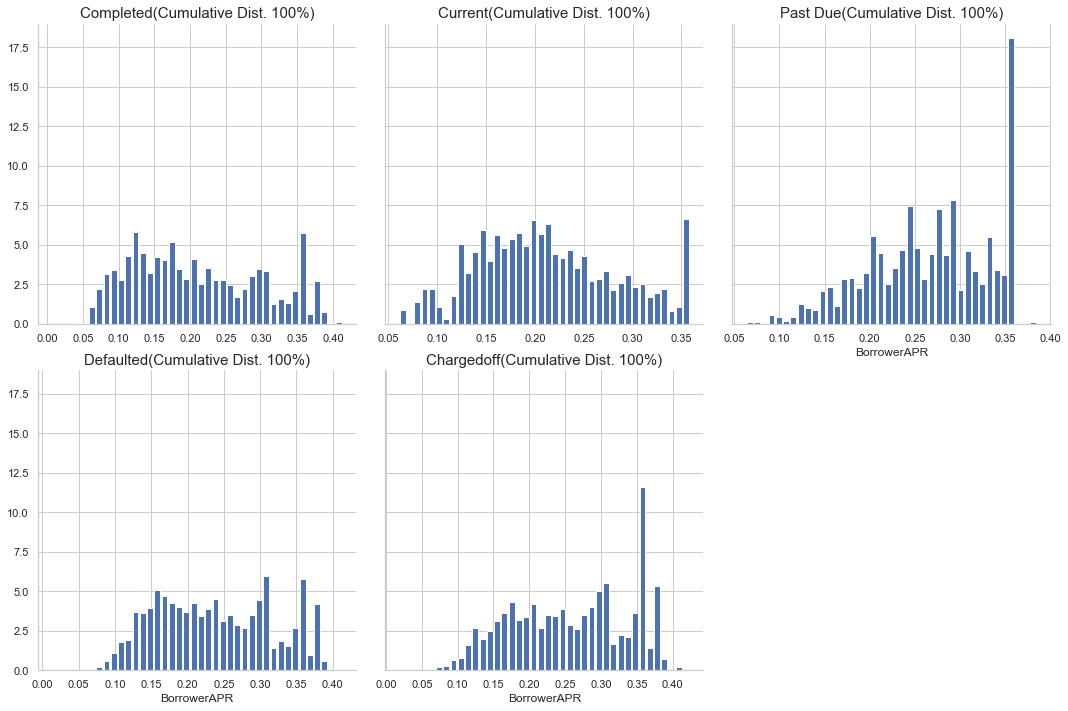

In [5]:
sb.set(style="whitegrid")
row_name = ['CPD(100%)']
g = sb.FacetGrid(data = loan_data, col = 'LoanStatus', height = 5, aspect = 1, col_wrap = 3, sharex=False);
g.map(plt.hist, 'BorrowerAPR', bins=40, density=True, rwidth=0.8, align='mid', stacked=True);
g.set_titles('{col_name}(Cumulative Dist. 100%)', size=15);

As you can see, Completed or Current loans have a slight left skew towards lower annual percentage rates while the opposite is true for the other 'unsuccessful' categories. Especially when it comes to the 'Past Due' category. This category could probably use more data points to paint a clearer picture of the impact. However, there are clear trends that APR could have a significant effect on whether or not loans are repayed as intended. I would suggest Prosper explore these trends with more data and other factors to increase their overall profit margins.